In [5]:
import sqlite3
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
conn = sqlite3.connect('/home/nick/Desktop/NUREU17/LSST/VariableStarClassification/features.db')
cur = conn.cursor()

In [3]:
df = pd.read_sql_query("select * from feats2", conn)

In [ ]:
sns.pairplot(df, vars = ('freq1_freq', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'), diag_kind = 'hist')

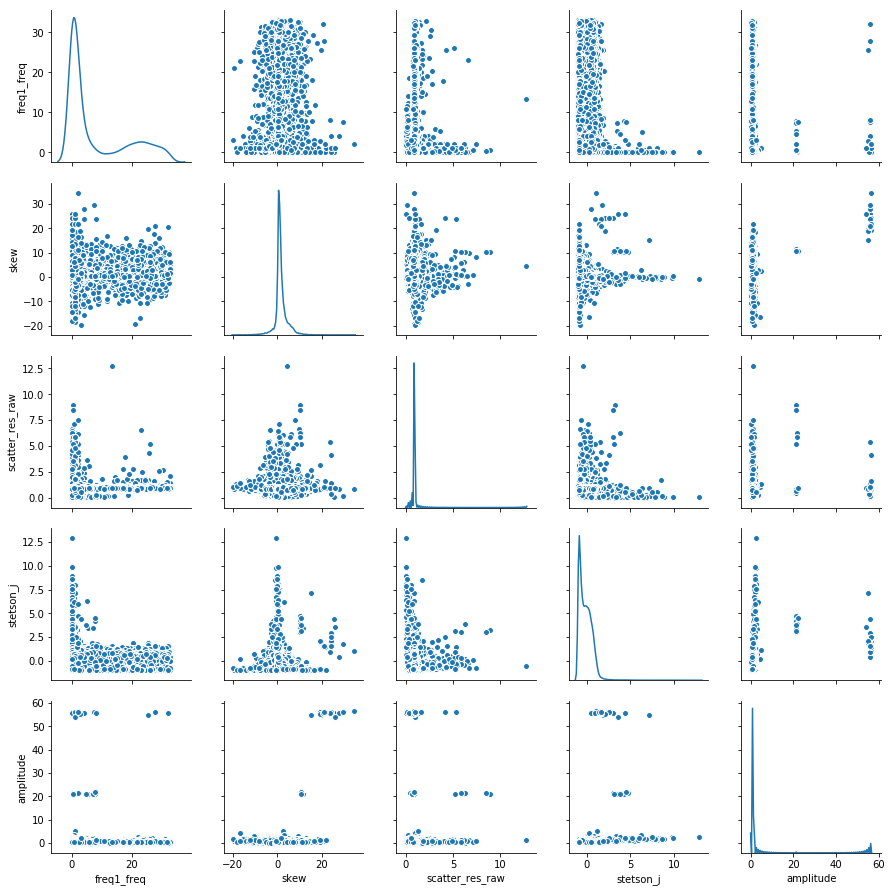

In [6]:
sns.pairplot(df, vars = ('freq1_freq', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'), diag_kind = 'kde')

In [4]:
cur.execute("""select oid from feats2 where amplitude>10""")
t = cur.fetchall()

In [5]:
dt = df.assign(period = lambda x: 1/x['freq1_freq'])

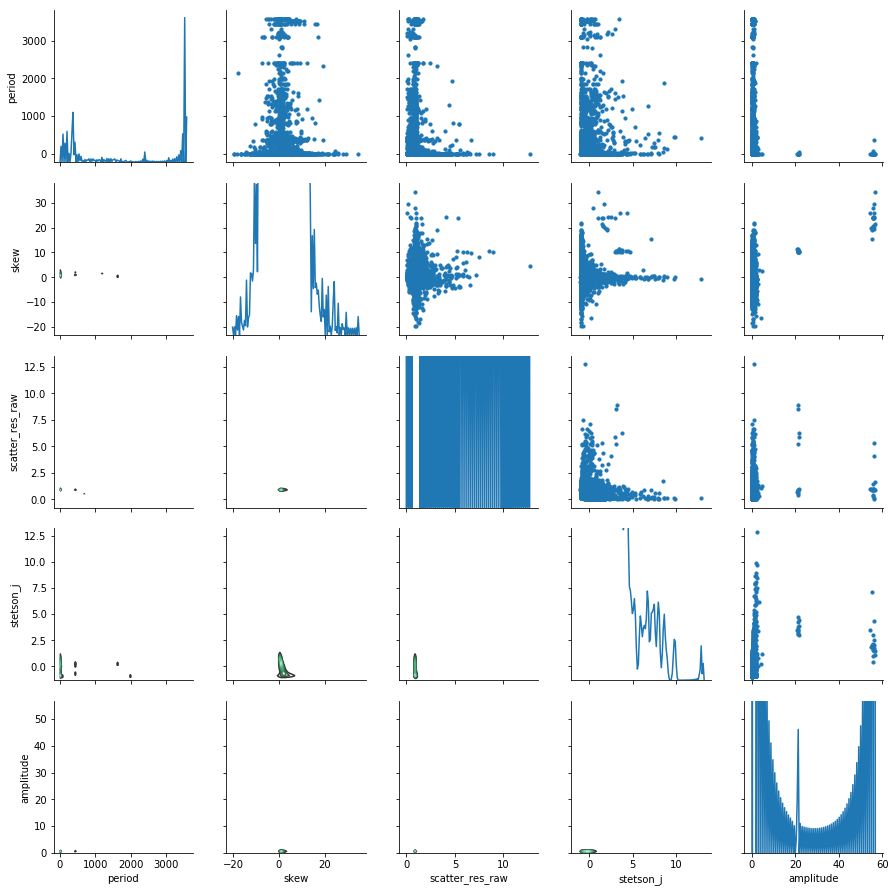

In [7]:
g = sns.PairGrid(dt, vars=('period', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'))
g = g.map_upper(plt.scatter, s=10)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, legend= False)

In [4]:
cur.execute("""select freq1_freq, skew, scatter_res_raw,stetson_j,amplitude from sigfeats""")
d = cur.fetchall()
data = list(zip(*d))

In [6]:
def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.cubehelix_palette(8, as_cmap=True)
    ax = plt.gca()
    xmin, xmax = min_series[x.name], max_series[x.name]
    ymin, ymax = min_series[y.name], max_series[y.name]
    plt.hexbin(x, y, gridsize=50, bins = 'log', mincnt = 1, cmap=cmap, extent=[xmin, xmax, ymin, ymax], **kwargs)


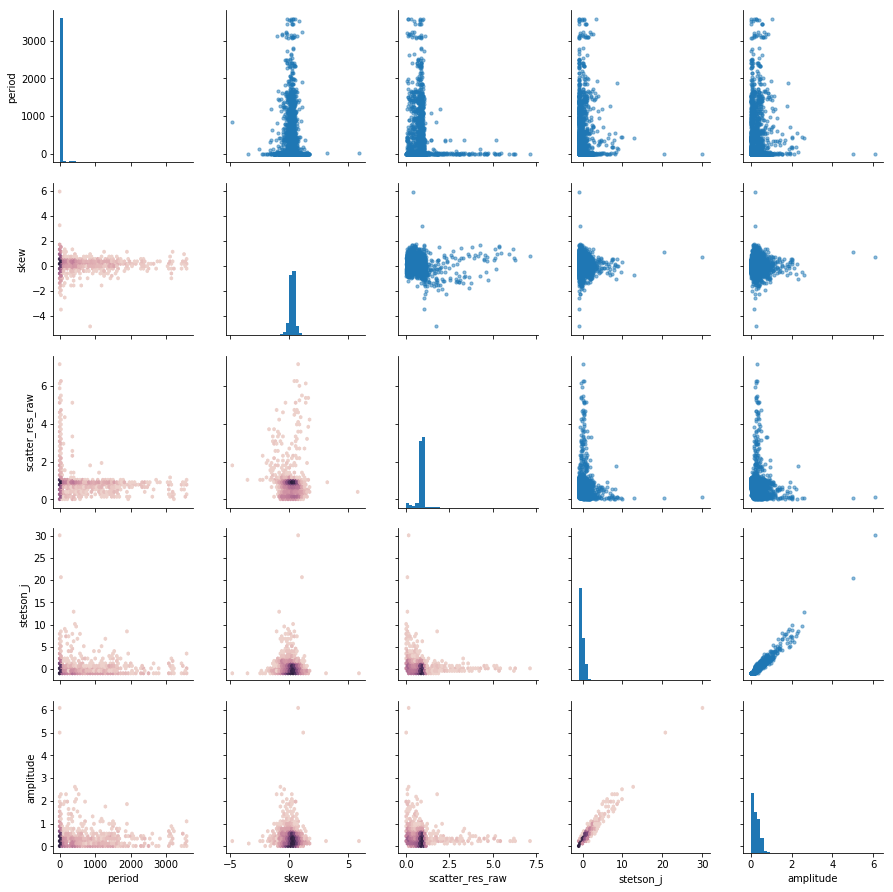

In [30]:
df = pd.read_sql_query("""select freq1_freq, skew, scatter_res_raw,stetson_j,amplitude from sigfeats""", conn)
dt = df.assign(period = lambda x: 1/x['freq1_freq'])

gr = sns.PairGrid(dt, vars=('period', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'))
gr = gr.map_upper(plt.scatter, s=10, alpha = .5)
gr = gr.map_lower(hexbin, color="red", max_series=dt.max(), min_series=dt.min())
gr = gr.map_diag(plt.hist, bins = 40)#,shade = 'true', legend= False)

/home/nke2/miniconda3/envs/tmpJupyter/lib/python3.6/site-packages/seaborn/distributions.py:275: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


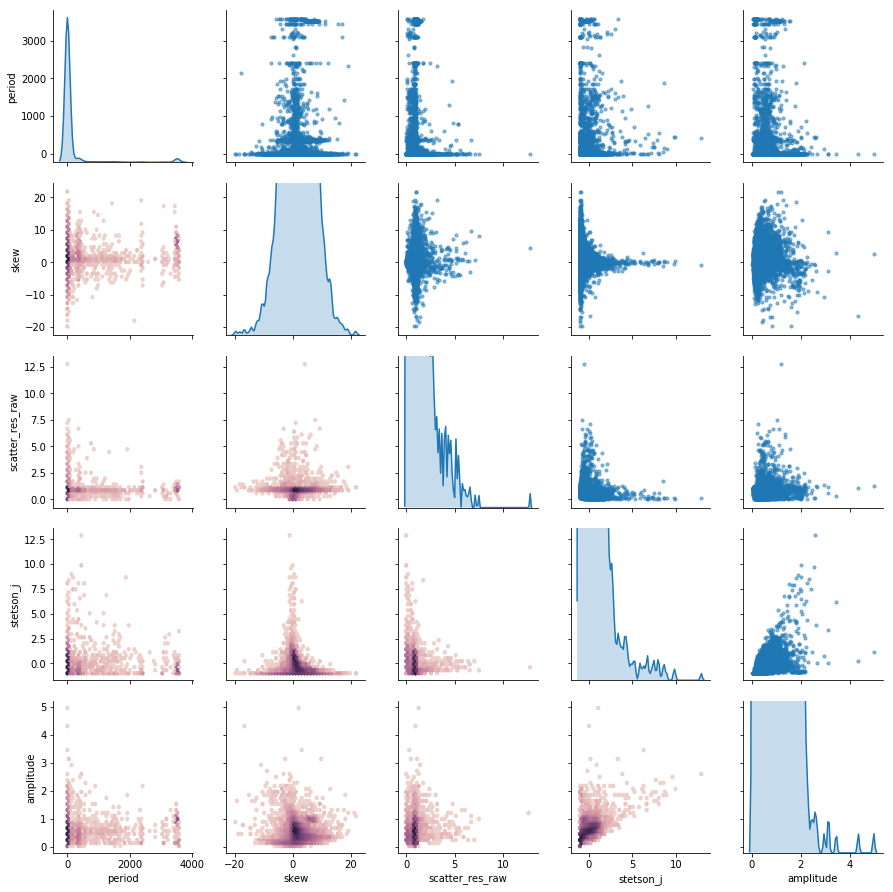

In [28]:
df = pd.read_sql_query("""select freq1_freq, skew, scatter_res_raw,stetson_j,amplitude from feats2 where amplitude<20""", conn)
dt = df.assign(period = lambda x: 1/x['freq1_freq'])

def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.cubehelix_palette(8, as_cmap=True)
    ax = plt.gca()
    xmin, xmax = min_series[x.name], max_series[x.name]
    ymin, ymax = min_series[y.name], max_series[y.name]
    plt.hexbin(x, y, gridsize=40, bins = 'log', mincnt = 1, cmap=cmap, extent=[xmin, xmax, ymin, ymax], **kwargs)


gr = sns.PairGrid(dt, vars=('period', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'))
gr = gr.map_upper(plt.scatter, s=10, alpha = .5)
gr = gr.map_lower(hexbin, color="red", max_series=dt.max(), min_series=dt.min())
gr = gr.map_diag(sns.kdeplot, legend= False, shade = 'true')

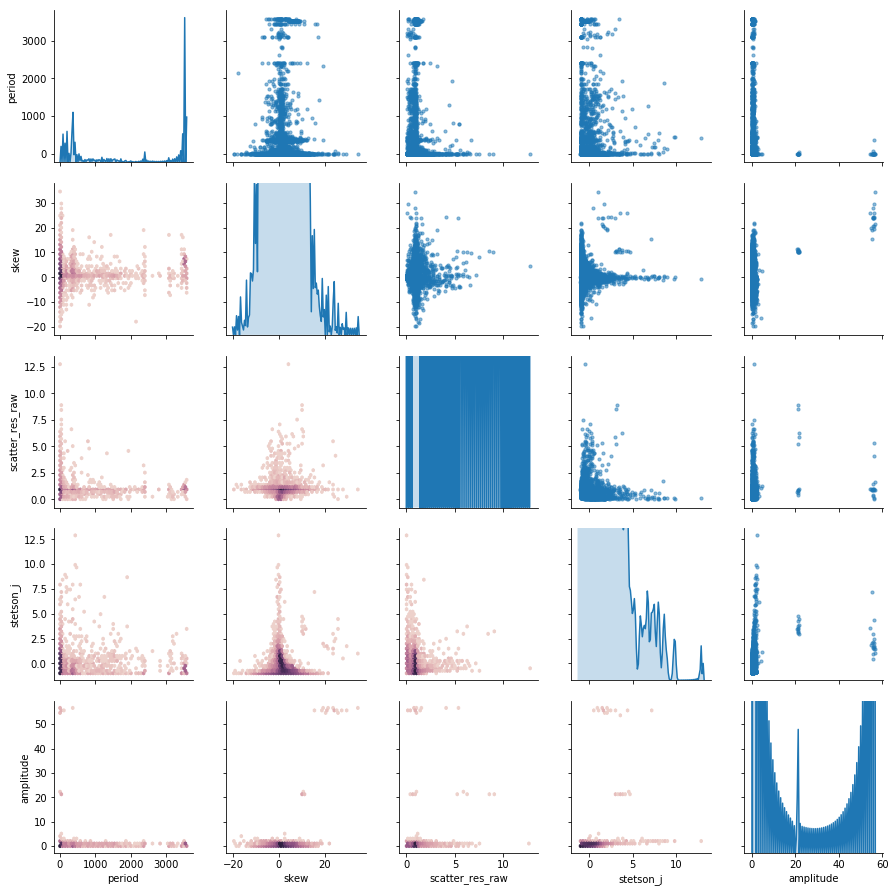

In [8]:
df = pd.read_sql_query("""select freq1_freq, skew, scatter_res_raw,stetson_j,amplitude from feats2""", conn)
dt = df.assign(period = lambda x: 1/x['freq1_freq'])

gr = sns.PairGrid(dt, vars=('period', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'))
gr = gr.map_upper(plt.scatter, s=10, alpha = .5)
gr = gr.map_lower(hexbin, color="red", max_series=dt.max(), min_series=dt.min())
gr = gr.map_diag(sns.kdeplot, legend= False, shade = 'true')

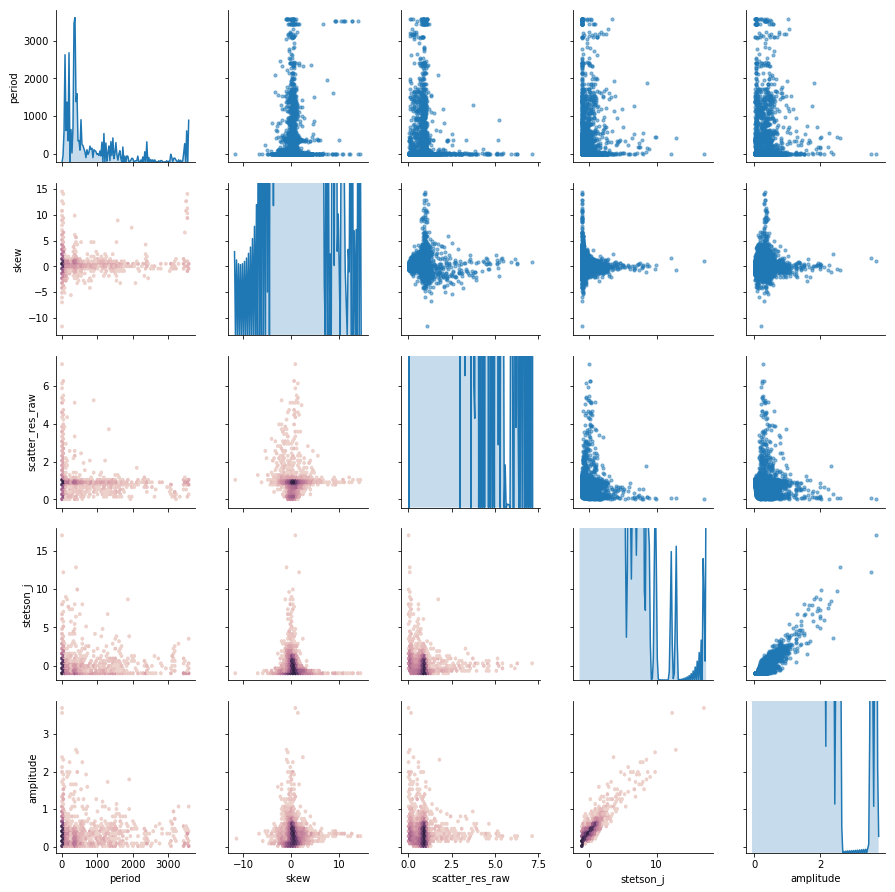

In [9]:
df = pd.read_sql_query("""select freq1_freq, skew, scatter_res_raw,stetson_j,amplitude from sigfeatscopy""", conn)
dt = df.assign(period = lambda x: 1/x['freq1_freq'])

gr = sns.PairGrid(dt, vars=('period', 'skew', 'scatter_res_raw', 'stetson_j', 'amplitude'))
gr = gr.map_upper(plt.scatter, s=10, alpha = .5)
gr = gr.map_lower(hexbin, color="red", max_series=dt.max(), min_series=dt.min())
gr = gr.map_diag(sns.kdeplot, legend= False, shade = 'true')